### Introduction

In [ ]:
# Text Mining Analysis and Model Evaluation using this following dataset:
# https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset

### Install packages

In [1]:
# Load all required libraries
!pip install pandas
!pip install numpy
!pip install nltk
!pip install gensim
!pip install pyLDAvis
!pip install -U scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached numpy-1.24.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.2
    Uninstalling numpy-1.22.2:
      Successfully uninstalled numpy-1.22.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.12.0 requires numpy<1.24,>=1.22, but you have numpy 1.24.3 which is i

In [2]:
# Load all required libraries
!pip uninstall numpy
!pip install numpy==1.22.2

Found existing installation: numpy 1.24.3
Uninstalling numpy-1.24.3:
  Would remove:
    /usr/local/bin/f2py
    /usr/local/bin/f2py3
    /usr/local/bin/f2py3.10
    /usr/local/lib/python3.10/dist-packages/numpy-1.24.3.dist-info/*
    /usr/local/lib/python3.10/dist-packages/numpy.libs/libgfortran-040039e1.so.5.0.0
    /usr/local/lib/python3.10/dist-packages/numpy.libs/libopenblas64_p-r0-15028c96.3.21.so
    /usr/local/lib/python3.10/dist-packages/numpy.libs/libquadmath-96973f99.so.0.0.0
    /usr/local/lib/python3.10/dist-packages/numpy/*
Proceed (Y/n)? Y
  Successfully uninstalled numpy-1.24.3
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached numpy-1.22.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.8 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pyldavis 3.4.1 requires nump

In [3]:
# Load all required libraries
import pandas as pd
import numpy as np
import nltk
import nltk.corpus
import nltk.sentiment
import matplotlib.pyplot as plt
import re
import string
import os

from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from matplotlib.colors import ListedColormap
from string import punctuation
from wordcloud import WordCloud 
from matplotlib import pyplot as plt

nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('vader_lexicon')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package 

True

In [4]:
# Load all required libraries
import gensim
import pyLDAvis
import pyLDAvis.gensim
from sklearn.metrics import confusion_matrix, precision_score, recall_score, classification_report, accuracy_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics
from gensim import corpora

### Load Data

In [5]:
#Load the Dataset
df=pd.read_csv("ham_spam.csv")
df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Sentiment,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


### PreProcessing

In [6]:
# Tokenize the text data and store it in a new column 'Token' of the data frame
df['Token'] = df['Text'].apply(lambda x: word_tokenize(x.lower()))

# Load the stop words and punctuations and exclude them from tokenized data
stopwords = stopwords.words('english')
punctuation = list(punctuation)
words = set(nltk.corpus.words.words())   
df['Token'] = df['Token'].apply(lambda x: [t for t in x if t not in stopwords and t not in punctuation and t in words])

# Calculate the frequency distribution of tokens and store it in a new column 'freqdist'
df['freqdist'] = df['Token'].apply(lambda x: FreqDist(x))

# Lemmatize the words in the 'Token' column and store the result in the same column
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text])
df["Token"] = df["Token"].apply(lambda text: lemmatize_words(text))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Feature Representation

In [7]:
# Creating an instance of CountVectorizer and fitting it to the tokenized text data
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df.Token)

# Converting the transformed data into a pandas DataFrame
df_bow_sklearn = pd.DataFrame(X.toarray(),columns=vectorizer.get_feature_names_out())
df_bow_sklearn

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,aa,abbey,abdomen,ability,able,abnormally,abroad,absence,absolutely,abstract,...,yogasana,yor,young,younger,yr,yummy,zac,zebra,zed,zoom
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5568,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5569,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5570,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Text Classification

In [8]:
# Create a new column 'Sentiment' in the dataframe df_bow_sklearn and assign the values from the 'Sentiment' column of df
df_bow_sklearn['Sentiment']=df['Sentiment']

# Extract the features from the df_bow_sklearn dataframe and assign them to X, while assigning the 'Sentiment' column as target to y
X = df_bow_sklearn.loc[:, df_bow_sklearn.columns != 'Sentiment']
y = df_bow_sklearn.loc[:, df_bow_sklearn.columns == 'Sentiment'].values.ravel()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [9]:
# Initialize a RandomForestClassifier model with 10 decision trees, and compute the cross-validation scores for 5 folds
clf = RandomForestClassifier(n_estimators=10, random_state=0)
scores = cross_val_score(clf, X, y, cv=5)
print(scores.mean())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.9650037436297912


In [10]:
# Convert the tokenized text data to a list of lists
text_data = []
for i in range(df.shape[0]):
    text_data.append(df.Token[i].split())

# Create a dictionary of all the unique words in the text data
dictionary = corpora.Dictionary(text_data)

# Convert the tokenized text data to a bag of words format
corpus = [dictionary.doc2bow(text) for text in text_data]

# Create an LDA model with 10 topics using the bag of words format and the dictionary
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = 10, id2word=dictionary, passes=15)
topics = ldamodel.print_topics(num_words=4)

# Print the top 4 words in each of the 10 topics
for topic in topics:
    print(topic)

# Generate an interactive visualization of the LDA model using pyLDAvis and display it in the Jupyter Notebook
vis = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary, mds='mmds')   
pyLDAvis.display(vis)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(0, '0.031*"call" + 0.028*"know" + 0.026*"yeah" + 0.022*"send"')
(1, '0.034*"going" + 0.027*"back" + 0.022*"go" + 0.021*"get"')
(2, '0.041*"like" + 0.030*"dont" + 0.025*"work" + 0.021*"know"')
(3, '0.136*"u" + 0.023*"good" + 0.021*"r" + 0.016*"day"')
(4, '0.032*"come" + 0.024*"day" + 0.023*"home" + 0.023*"happy"')
(5, '0.050*"da" + 0.049*"got" + 0.019*"hi" + 0.018*"one"')
(6, '0.059*"free" + 0.054*"ur" + 0.030*"get" + 0.021*"week"')
(7, '0.067*"call" + 0.026*"stop" + 0.026*"reply" + 0.025*"later"')
(8, '0.062*"u" + 0.029*"n" + 0.022*"already" + 0.021*"wat"')
(9, '0.024*"call" + 0.022*"dear" + 0.021*"ur" + 0.018*"u"')


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


### Summary

In [11]:
# Calculate word frequencies for each document and store them in a dictionary
word_frequencies={}
for index, row in df.iterrows():
    for lkey in row['freqdist'].keys():
        if lkey not in word_frequencies:
            word_frequencies[lkey]=row['freqdist'].get(lkey)
        else:
            word_frequencies[lkey]+=row['freqdist'].get(lkey)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [12]:
# Find the maximum frequency of a word
maximum_frequncy = max(word_frequencies.values())

for word in word_frequencies.keys():
    word_frequencies[word] = (word_frequencies[word]/maximum_frequncy)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [13]:
# Normalize the frequency of each word by the maximum frequency
sentence_scores = {}
new_col=[]
for index, row in df.iterrows():
    if row['Token'] != '':
        for word in row['Token'].split(' '):
            if word in word_frequencies.keys():
                if row['Token'] not in sentence_scores.keys():
                    sentence_scores[row['Token']] = word_frequencies[word]
                else:
                    sentence_scores[row['Token']] += word_frequencies[word]
        new_col.append(sentence_scores[row['Token']])
    else:
        new_col.append(0)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [14]:
# Add the sentence scores as a new column in the DataFrame
df['sentence_score']=new_col
df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Sentiment,Text,Token,freqdist,sentence_score
0,ham,"Go until jurong point, crazy.. Available only ...",go point crazy available n great world la e bu...,"{'go': 1, 'point': 1, 'crazy': 1, 'available':...",0.955106
1,ham,Ok lar... Joking wif u oni...,lar u,"{'lar': 1, 'u': 1}",1.033451
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry win fa cup final may text fa receiv...,"{'free': 1, 'entry': 2, 'win': 1, 'fa': 2, 'cu...",0.794894
3,ham,U dun say so early hor... U c already then say...,u dun say early u c already say,"{'u': 2, 'dun': 1, 'say': 2, 'early': 1, 'c': ...",2.418134
4,ham,"Nah I don't think he goes to usf, he lives aro...",think go around though,"{'think': 1, 'goes': 1, 'around': 1, 'though': 1}",0.441901
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,time tried contact u pound prize claim easy ca...,"{'time': 1, 'tried': 1, 'contact': 1, 'u': 1, ...",2.061620
5568,ham,Will ü b going to esplanade fr home?,b going esplanade home,"{'b': 1, 'going': 1, 'esplanade': 1, 'home': 1}",0.357394
5569,ham,"Pity, * was in mood for that. So...any other s...",pity mood,"{'pity': 1, 'mood': 1}",0.007923
5570,ham,The guy did some bitching but I acted like i'd...,guy like interested something else next week g...,"{'guy': 1, 'like': 1, 'interested': 1, 'someth...",1.738556


In [15]:
# Create word clouds for ham and spam messages separately
df.sort_values(by=['sentence_score'],ascending=False).head(30)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Sentiment,Text,Token,freqdist,sentence_score
5558,ham,"Sorry, I'll call later",sorry call later,"{'sorry': 1, 'call': 1, 'later': 1}",23.795775
5458,ham,"Sorry, I'll call later",sorry call later,"{'sorry': 1, 'call': 1, 'later': 1}",23.028169
5423,ham,"Sorry, I'll call later",sorry call later,"{'sorry': 1, 'call': 1, 'later': 1}",22.260563
5191,ham,"Sorry, I'll call later",sorry call later,"{'sorry': 1, 'call': 1, 'later': 1}",21.492958
4405,ham,"Sorry, I'll call later &lt;#&gt; mins",sorry call later,"{'sorry': 1, 'call': 1, 'later': 1}",20.725352
4191,ham,"Sorry, I'll call later",sorry call later,"{'sorry': 1, 'call': 1, 'later': 1}",19.957746
1721,ham,"Fighting with the world is easy, u either win ...",fighting world easy u either win lose close u ...,"{'fighting': 1, 'world': 1, 'easy': 1, 'u': 6,...",19.315141
4173,ham,"Sorry, I'll call later",sorry call later,"{'sorry': 1, 'call': 1, 'later': 1}",19.190141
4128,ham,"Sorry, I'll call later",sorry call later,"{'sorry': 1, 'call': 1, 'later': 1}",18.422535
3594,ham,"Sorry, I'll call later",sorry call later,"{'sorry': 1, 'call': 1, 'later': 1}",17.654930


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


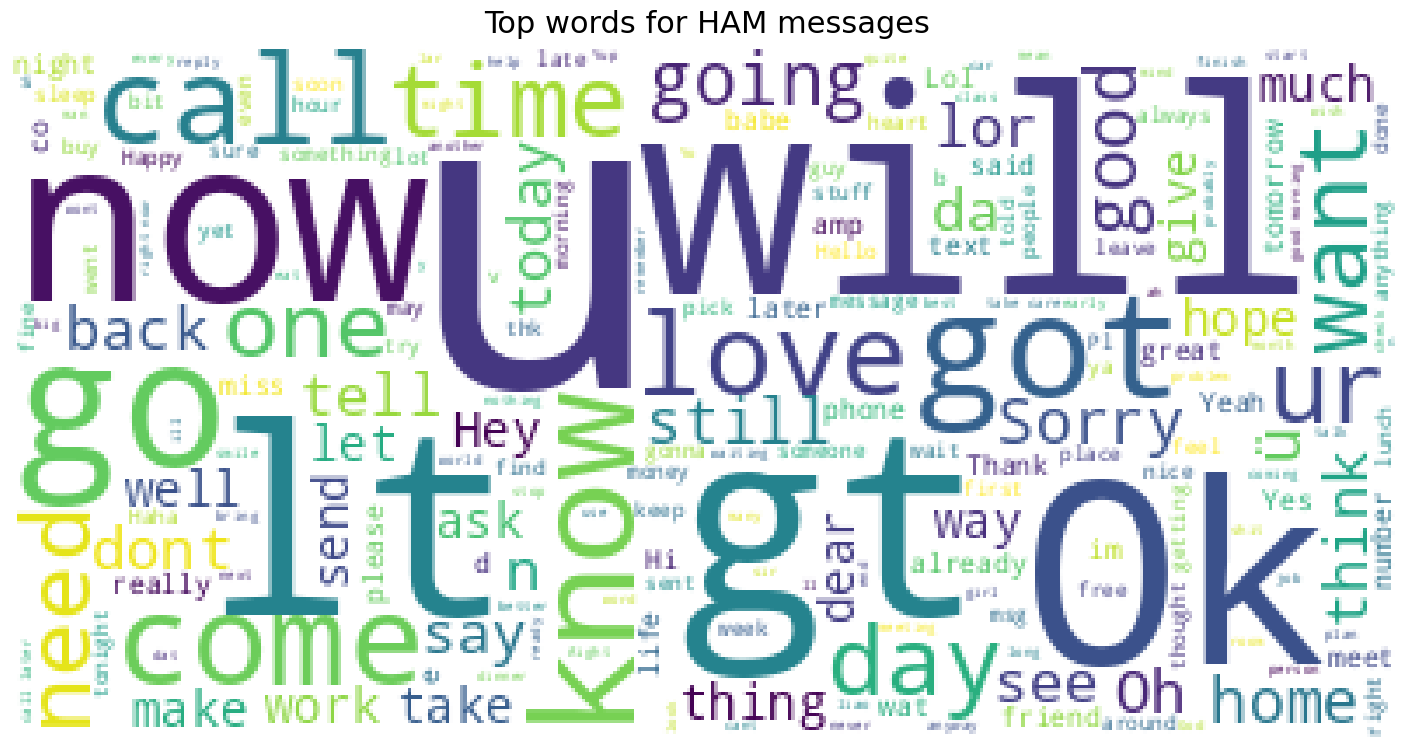

In [16]:
# Create a WordCloud object for ham messages
wc = WordCloud(
    background_color='white', 
    max_words=200, 
    # mask=twitter_mask,
)

# Generate the word cloud for ham messages and display it
wc.generate(' '.join(text for text in df.loc[df['Sentiment'] == 'ham', 'Text']))
plt.figure(figsize=(18,10))
plt.title('Top words for HAM messages', 
          fontdict={'size': 22,  'verticalalignment': 'bottom'})
plt.imshow(wc)
plt.axis("off")
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


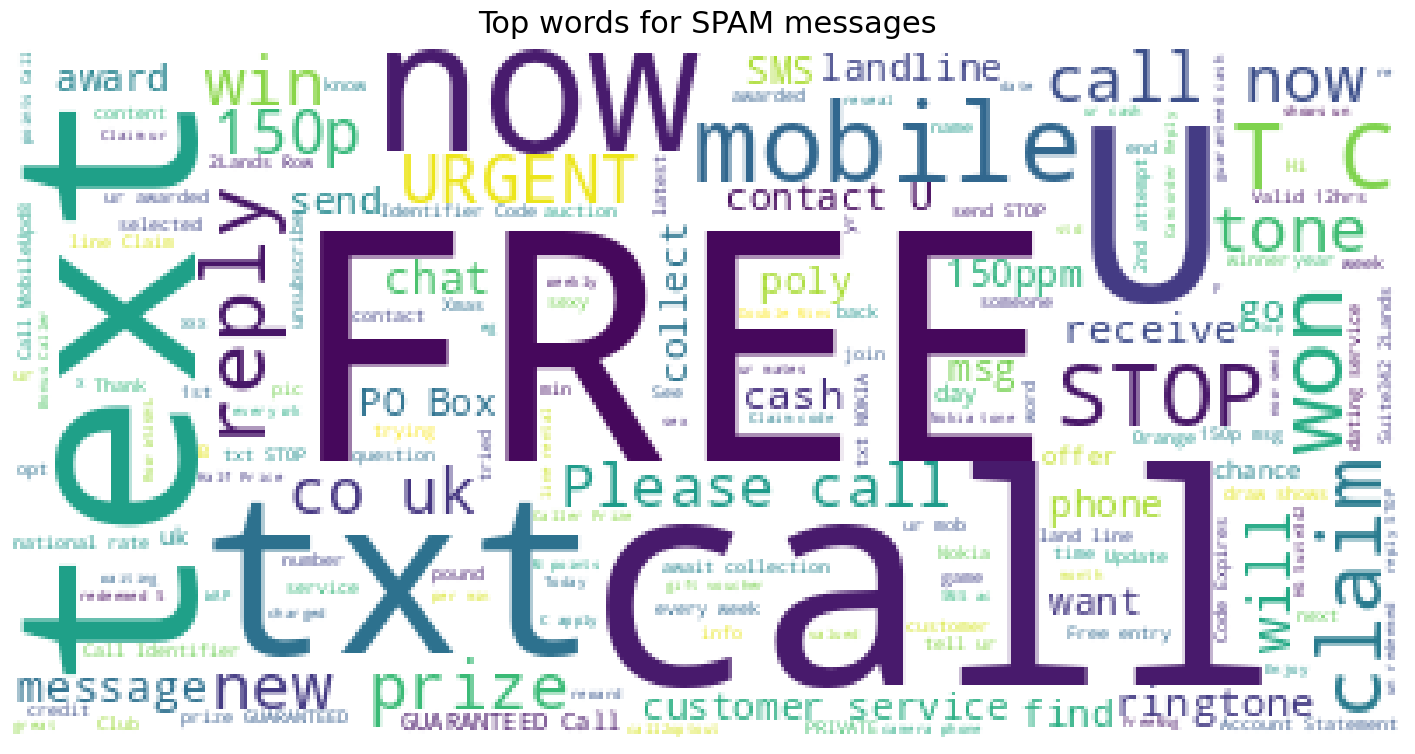

In [17]:
# Create a WordCloud object for spam messages
wc = WordCloud(
    background_color='white', 
    max_words=200, 
    # mask=twitter_mask,
)

# Generate the word cloud for spam messages and display it
wc.generate(' '.join(text for text in df.loc[df['Sentiment'] == 'spam', 'Text']))
plt.figure(figsize=(18,10))
plt.title('Top words for SPAM messages', 
          fontdict={'size': 22,  'verticalalignment': 'bottom'})
plt.imshow(wc)
plt.axis("off")
plt.show()

### Model Building

In [18]:
# Split the data into training and testing sets using train_test_split
y_corrected = pd.DataFrame(data=y, columns=['Sentiment'])
X_train, X_test, y_train, y_test = train_test_split(X, y_corrected, test_size=0.2, random_state=40)

# Print the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (4457, 3566)
X_test shape: (1115, 3566)
y_train shape: (4457, 1)
y_test shape: (1115, 1)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [19]:
# Define a list of classifiers and fit each one on the training set
classifiers = [MultinomialNB(), 
               RandomForestClassifier(),
               KNeighborsClassifier(), 
               SVC()]
for cls in classifiers:
    cls.fit(X_train, y_train)

# Define a dictionary to map integer values to classifier names
pipe_dict = {0: "NaiveBayes", 1: "RandomForest", 2: "KNeighbours",3: "SVC"}

# Use cross validation to evaluate the performance of each classifier
for i, model in enumerate(classifiers):
    cv_score = cross_val_score(model, X_train,y_train,scoring="accuracy", cv=10)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
<ipython-input-19-5385a64bf374>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  cls.fit(X_train, y_train)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. 

NaiveBayes: 0.963878 


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

RandomForest: 0.971508 


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

KNeighbours: 0.924835 


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

SVC: 0.968589 


### Evaluating Models

In [20]:
# Initialize empty lists for the calculated values
precision =[]
recall =[]
f1_score = []
trainset_accuracy = []
testset_accuracy = []

# Predict the training and testing sets using the classifier
for i in classifiers:
    pred_train = i.predict(X_train)
    pred_test = i.predict(X_test)

    # Calculate precision, recall, and f1 score for the testing set using the predicted labels and the actual labels
    prec = metrics.precision_score(y_test, pred_test, pos_label='ham')
    recal = metrics.recall_score(y_test, pred_test, pos_label='ham')
    f1_s = metrics.f1_score(y_test, pred_test, pos_label='ham')

    # Calculate training and testing set accuracy using the classifier's score method
    train_accuracy = model.score(X_train,y_train)
    test_accuracy = model.score(X_test,y_test)
  
    # Append the calculated values to their respective lists
    precision.append(prec)
    recall.append(recal)
    f1_score.append(f1_s)
    trainset_accuracy.append(train_accuracy)
    testset_accuracy.append(test_accuracy)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [21]:
# Initialize data of lists.
data = {'Precision':precision,
'Recall':recall,
'F1score':f1_score,
'Accuracy on Testset':testset_accuracy,
'Accuracy on Trainset':trainset_accuracy}

# Create pandas DataFrame.
Results = pd.DataFrame(data, index =["NaiveBayes", "RandomForest", "KNeighbours","SVC"])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [22]:
# Create a DataFrame with the provided data and set the index labels
Results = pd.DataFrame(data, index =["NaiveBayes", "RandomForest", "KNeighbours","SVC"])

# Create a custom color map
cmap2 = ListedColormap(["#FFB6C1","#ADD8E6"])

# Apply a background gradient to the DataFrame using the custom color map
Results.style.background_gradient(cmap=cmap2)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Precision,Recall,F1score,Accuracy on Testset,Accuracy on Trainset
NaiveBayes,0.982420,0.978373,0.980392,0.966816,0.992372
RandomForest,0.972700,0.990731,0.981633,0.966816,0.992372
KNeighbours,0.925643,1.000000,0.961386,0.966816,0.992372
SVC,0.964215,0.998970,0.981285,0.966816,0.992372


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


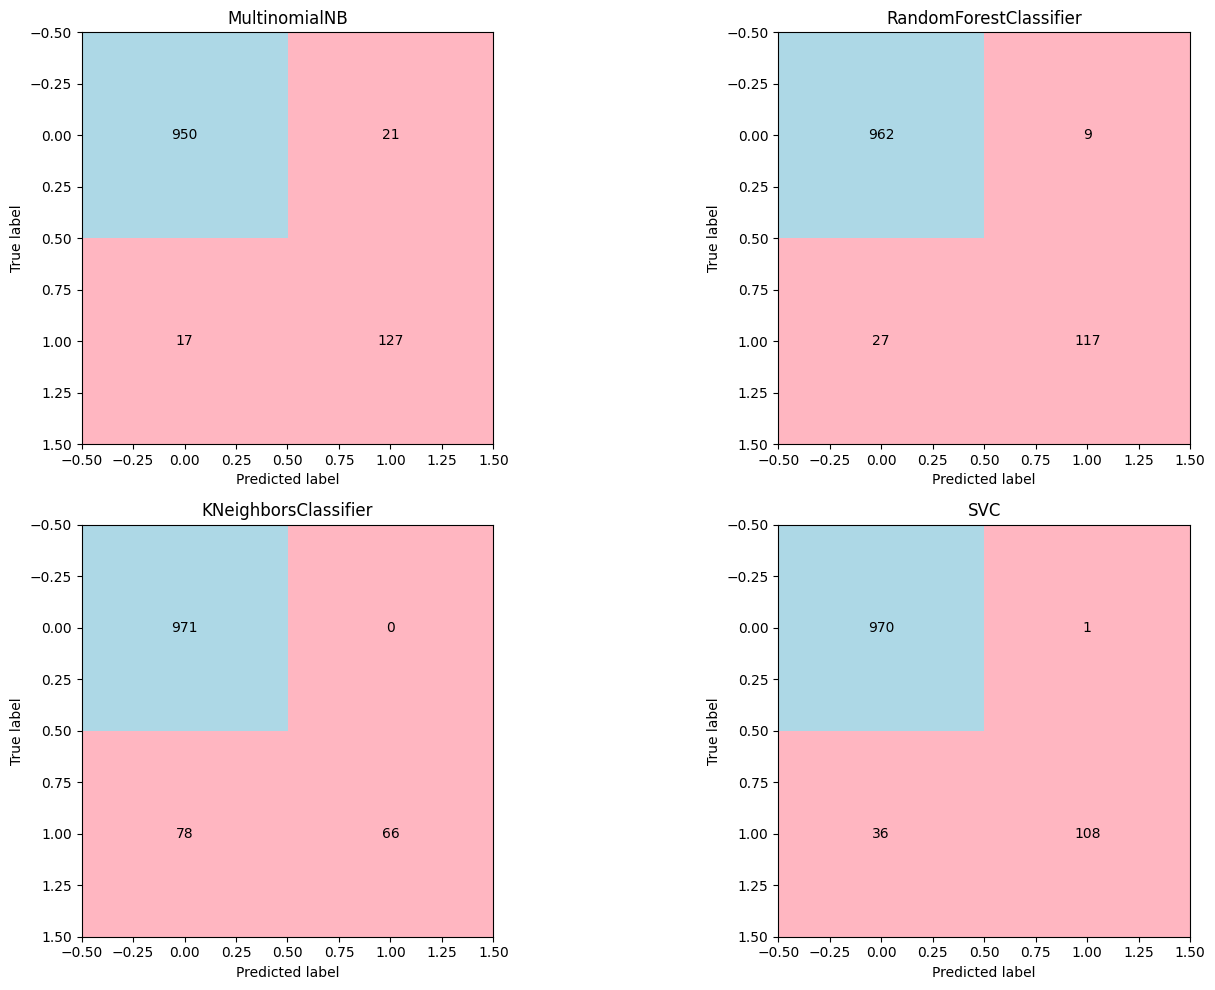

In [23]:
# Create a ListedColormap with two colors to use in the confusion matrix plots
cmap = ListedColormap(["#FFB6C1","#ADD8E6"])

# Create a figure with 2x2 subplots and set the size
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,10))

# Loop through the classifiers and their corresponding subplots
for cls, ax in zip(classifiers, axes.flatten()):
    # Make predictions on the test data using the current classifier
    y_pred = cls.predict(X_test)
    
    # Calculate the confusion matrix for the predictions and true labels
    cm = confusion_matrix(y_test, y_pred)
    
    # Plot the confusion matrix as an image with the chosen colormap
    ax.imshow(cm, cmap=cmap)
    
    # Set the title of the subplot to the name of the classifier
    ax.set_title(type(cls).__name__)
    
    # Set the x-axis label of the subplot to "Predicted label"
    ax.set_xlabel('Predicted label')
    
    # Set the y-axis label of the subplot to "True label"
    ax.set_ylabel('True label')
    
    # Add text to each cell of the confusion matrix with the value of the cell
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, cm[i, j], ha='center', va='center', color='black')
            
# Adjust the spacing between subplots and display the figure
plt.tight_layout()  
plt.show()